# Introduction
- Trong phần này, ta sẽ học về QR decomposition và một loại ma trận mới (orthogonal matrix). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Orthogonal Matrices 

- Orthogonal matrix (ma trận trực giao) là ma trận thỏa mãn tính chất sau : 
    1. Mỗi cột khác nhau đều trực giao (dot product = 0)
    2. Mỗi cột có norm chính xác bằng 1 
- Miêu tả biểu thức : $$ <q_i, q_j>= \begin{cases} 0 &\text{if i != j } \\ 1 &\text{if i = j} \end{cases}  $$
- Dựa vào đây ta có thể suy ra tính chất của ma trận trực giao đó là tích giữa ma trận đó và chuyển vị của nó là I. ($ Q^TQ = I = QQ^T$)

In [2]:
Q1 = np.array([
    [1, -1], [1, 1]
])

Q2 = np.array([
    [1, 2, 2], [2, 1, -2], [-2, 2, -1]
])
print(Q1.T @ Q1)
print(Q2 @ Q2.T)

[[2 0]
 [0 2]]
[[9 0 0]
 [0 9 0]
 [0 0 9]]


- Một số tính chất của ma trận trực giao : 
    1. Ma trận hoán vị (Permutation matrices) là một ma trận trực giao 
    2. Pure rotation (xoay không làm thay đổi chiều dài của vector) là phép nhân với ma trận trực giao 
- Ma trận trực giao có thể được tính từ một ma trận không trực giao từ QR decomposition, cái mà đơn gian là một phiên bản phức tạp hơn của Gram-Schmidt

# Gram-Schmidt 
- Là cách dùng để biến đổi ma trận không trực giao thành một ma trận trực giao (orthogonal matrix). 
- Có ít giá trị thực tiễn do không ổn định là kết quả từ nhiều phép chia, nhân bởi số bé. 
- Thuật toán : Với mỗi matrix V có vector cột $ v_1 $ đến $ v_n$ biến đổi thành một matrix trực giao Q với các cột tương ứng $q_k$. Vỡi mỗi vector cột từ trái qua phải : q
    1. Tại vector $v_k$ duyệt ngược lại tất cả các vector từ $v_{k - 1}$ đến $v_1$, thực hiện trực giao hóa các vector. 
    2. Chuẩn hóa tập matrix v với norm của nó


![Local Image](Img\Gram_Schmidt_process.png)

In [3]:
def GS_process(A : np.array) : 
    m = A.shape[0]
    n = A.shape[1]
    Q = np.zeros(A.shape)

    for i in range(n) :
        Q[:, i] = A[:,  i]

        a = A[:, i]
        for j in range(i) : 
            q = Q[:, j]
            Q[:, i] = Q[:, i] - np.dot(a, q) / np.dot(q, q) * q
        
        Q[:, i] = Q[:, i] / np.linalg.norm(Q[:, i])

    return Q


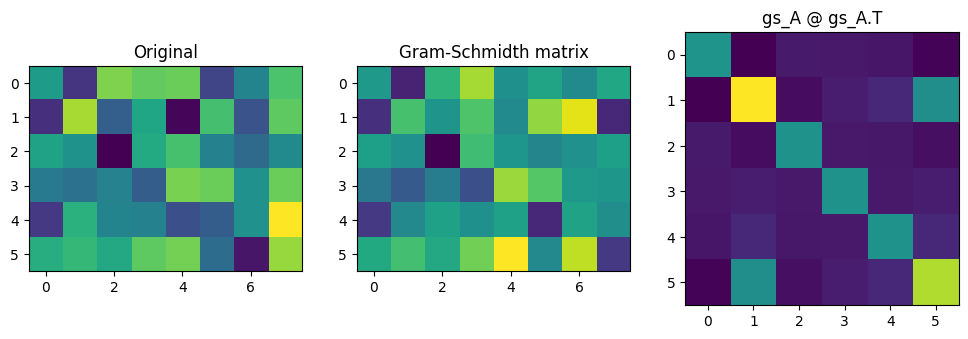

In [4]:
A = np.random.randn(6, 8)

gs_A = GS_process(A)

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))

ax[0].imshow(A)
ax[0].set_title('Original')

ax[1].imshow(gs_A)
ax[1].set_title('Gram-Schmidth matrix')

ax[2].imshow(gs_A @ gs_A.T)
ax[2].set_title('gs_A @ gs_A.T')

plt.show()

# QR Decomposition 
- Nếu gọi Q là một ma trận trực giao của A, Q có thể làm mất các thông tin có trong A do đó, do đó ta có thể sử dụng một ma trận R để lưu trữ thông tin bị mất đó. 
- Là kết quả của phép biến đổi Gram-Schmidt
- Công thức biến đổi : $$ A = QR \\ Q^T A = Q^T Q R  \\ Q^T A = R $$ 
- Với phép chuyển đổi này, ta có thể thay thế việc tìm ma trận nghịch đảo trong giải phương trình.  

In [5]:
A = np.random.randn(6, 6)
Q, R = np.linalg.qr(A)

In [6]:
A

array([[ 0.39126631, -0.09570991, -0.32870276,  0.1666431 ,  0.06127746,
        -0.5953946 ],
       [ 0.4519524 ,  0.61335834,  1.02096763,  0.96120806, -1.0381633 ,
         0.96856643],
       [ 1.5294809 , -2.72662033, -0.99779009, -1.16317834, -1.54690843,
         1.20123618],
       [-1.52740799, -1.44181097,  0.69204458, -0.94156065,  0.27632884,
        -0.75776782],
       [ 0.81386677,  0.6493304 ,  1.61856204, -0.46272116, -0.09838304,
        -0.57113837],
       [-0.06790041, -0.33791969, -0.61522661,  0.51732821, -0.16927096,
        -0.96412089]])

In [7]:
Q 

array([[-0.16393194,  0.00465967,  0.1263817 , -0.10356048, -0.77153508,
        -0.59257161],
       [-0.18935807, -0.22138007, -0.4103182 , -0.80629832,  0.23565823,
        -0.20278458],
       [-0.64081869,  0.75512017, -0.02831175, -0.00322164,  0.13539151,
         0.0014606 ],
       [ 0.63995019,  0.55048781, -0.50509815, -0.06842779, -0.14773363,
        -0.07612625],
       [-0.34099219, -0.25606965, -0.70727912,  0.33589251, -0.32902719,
         0.31116915],
       [ 0.02844877,  0.11024602,  0.24392046, -0.47078842, -0.4480891 ,
         0.71071353]])

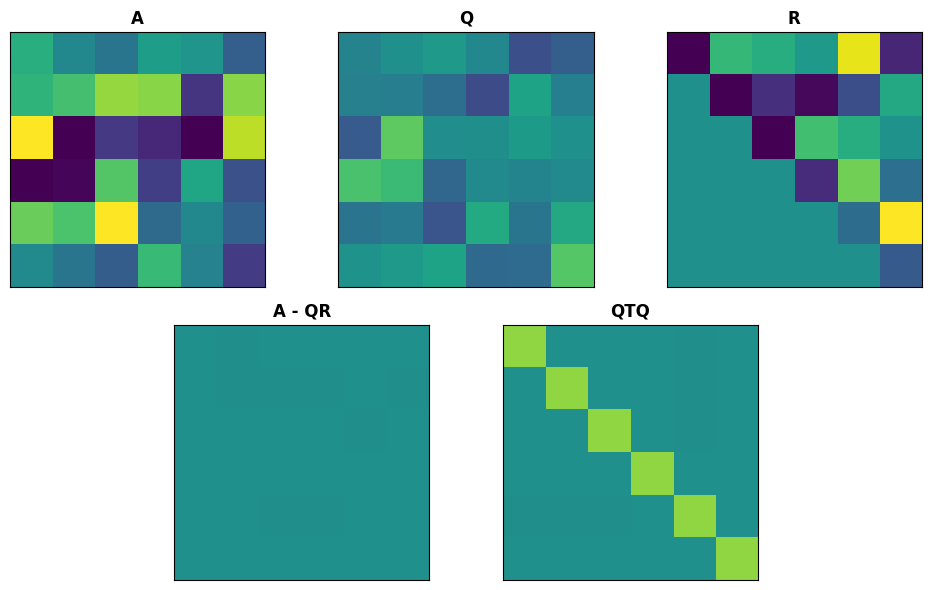

In [8]:
from matplotlib.gridspec import GridSpec 

fig = plt.figure(figsize = (10, 6))
ax = [0] * 5
# color limit
c = 1.5
# use gridspec module with 2 row unit and 6 cols unit 
gs1 = GridSpec(2, 6)

ax[0] = plt.subplot(gs1[0, :2])
ax[0].imshow(A, vmin = -c, vmax = c)
ax[0].set_title('A', fontweight = 'bold')

ax[1] = plt.subplot(gs1[0, 2 : 4])
ax[1].imshow(Q, vmin = -c, vmax = c)
ax[1].set_title('Q', fontweight = 'bold')

ax[2] = plt.subplot(gs1[0, 4 : 6])
ax[2].imshow(R, vmin = -c, vmax = c)
ax[2].set_title('R', fontweight = 'bold')

ax[3] = plt.subplot(gs1[1, 1 : 3])
ax[3].imshow(A - Q @ R, vmin = -c, vmax = c)
ax[3].set_title('A - QR', fontweight = 'bold')

ax[4] = plt.subplot(gs1[1, 3 : 5])
ax[4].imshow(Q.T @ Q, vmin = -c, vmax = c)
ax[4].set_title('QTQ', fontweight = 'bold')

for a in ax : 
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.show()

- Nhận xét : Ma trận R luôn là một ma trận tam giác trên

## Size of Q and R 
- Kích thước của ma trận Q hoặc R đều phụ thuộc vào ma trận A, và QR decomposition là một ma trận 'reduced' hay 'full'  (luật này chỉ áp dụng với ma trận cao (tall matrix)). 
- Reduced trả về ma trận Q, R với chiều tương ứng (M, min(M, N)), (min(M, N), N)
- Compete trả về ma trận Q, R với chiều tương ứng (M, M) (M, N)
- Câu hỏi đặt ra là khi nào ma trận Q thu được có N cols hoặc M cols 

![Local Image](Img\Figure9_2.png)

In [9]:
A = np.array([[1, -1]]).T
Q, R = np.linalg.qr(A, 'complete')
Q 

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [10]:
Q, R = np.linalg.qr(A, 'reduced')
Q

array([[-0.70710678],
       [ 0.70710678]])

- Nhận xét : 
    1. Rank của ma trận Q luôn đạt giá trị lớn nhất trong các trường hợp 
    2. Rank của R bằng với rank của A 
    3. Sự khác biệt giữa rank của Q và rank của A là vì Q mở rộng cho không gian $R^M$ kể quả khi A có chiều nhỏ hơn không gian con của $R^M$ 
    4. QR decomposition không duy nhất cho tất cả matrix size và rank. Ta có thể thu được nhiều hơn 1 ma trận Q thỏa mãn

## Why R is upper triangular 
- Ta có ma trận R được tính bởi công thức $ R = Q^T A $ 
- Vì dựa vào phép Gram-Smchitd, các vector cột sau đảm bảo vuông góc với vector cột trước nó, do đó, ma trận hình thành ma trận tam giác vuông dưới, q[i] sẽ vuông góc với tất cả các A trước đó
- Nếu cột i,  j của A tương ứng vuông góc thì khi đó, R = I 


## QR and Inverse 
- QR decomposition cung cấp cách thức tính số ổn định hơn để tính toán matrix inverse. $$ A = QR  \\ A^{-1} = (QR)^{-1} \\ A^{-1} = R^{-1}Q^{-1} \\ A^{-1} = R^{-1} Q^T $$ 
- Ta chỉ cần tìm inverse của R mà R là một ma trận tam giác nên nghịch đảo của nó đảm bảo hơn